<a href="https://colab.research.google.com/github/snehagupta98/ShapeAI_Python_Machine_Learning/blob/main/Supermart_Grocery_Sales_Retail_Analytics_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Week 1: Initial Setup & Data Understanding

import pandas as pd

# Load dataset
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

# Basic info
print("Shape of dataset:", df.shape)
print("\nColumns:\n", df.columns)
print("\nInfo:\n")
df.info()

# Preview data
print(df.head())

# Check for nulls
print("\nMissing values:\n", df.isnull().sum())

# Check unique values per column
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")


Shape of dataset: (9994, 11)

Columns:
 Index(['Order ID', 'Customer Name', 'Category', 'Sub Category', 'City',
       'Order Date', 'Region', 'Sales', 'Discount', 'Profit', 'State'],
      dtype='object')

Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       9994 non-null   object 
 1   Customer Name  9994 non-null   object 
 2   Category       9994 non-null   object 
 3   Sub Category   9994 non-null   object 
 4   City           9994 non-null   object 
 5   Order Date     9994 non-null   object 
 6   Region         9994 non-null   object 
 7   Sales          9994 non-null   int64  
 8   Discount       9994 non-null   float64
 9   Profit         9994 non-null   float64
 10  State          9994 non-null   object 
dtypes: float64(2), int64(1), object(8)
memory usage: 859.0+ KB
  Order ID Customer Name          Category 

In [2]:
# Week 2: Cleaning and Preprocessing

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], format="%d-%m-%Y", errors='coerce')

# Extract useful date features
df['Month'] = df['Order Date'].dt.month
df['Year'] = df['Order Date'].dt.year
df['Weekday'] = df['Order Date'].dt.day_name()

# Drop duplicates if any
df.drop_duplicates(inplace=True)

# Handling missing values
df.fillna(0, inplace=True)

# Check again
print(df.isnull().sum())


Order ID         0
Customer Name    0
Category         0
Sub Category     0
City             0
Order Date       0
Region           0
Sales            0
Discount         0
Profit           0
State            0
Month            0
Year             0
Weekday          0
dtype: int64


/tmp/ipython-input-2-643112814.py:15: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  df.fillna(0, inplace=True)


/tmp/ipython-input-3-2845166007.py:8: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Category', y='Sales', estimator='sum', ci=None)


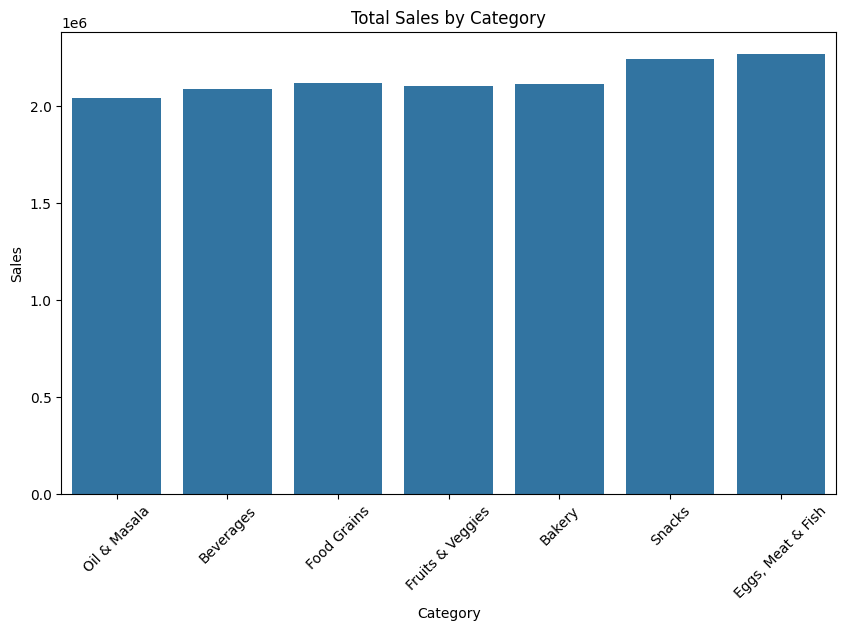

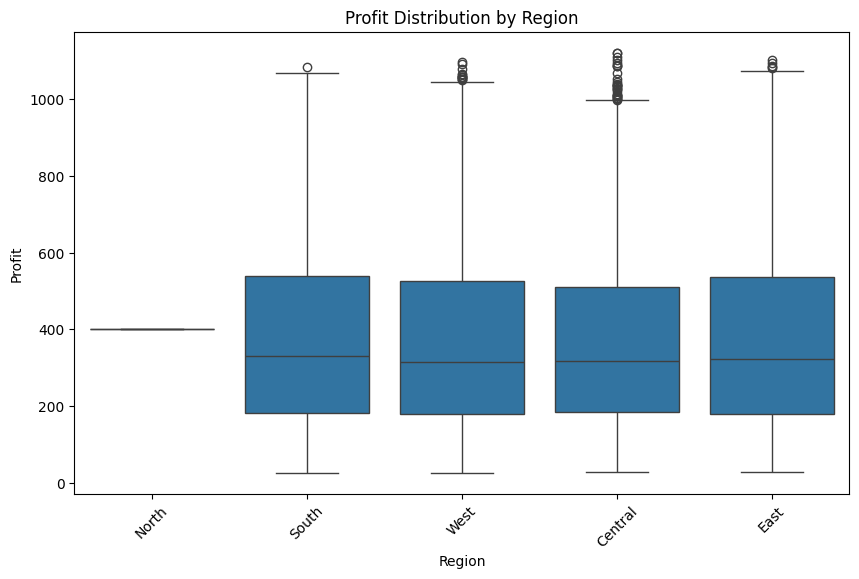

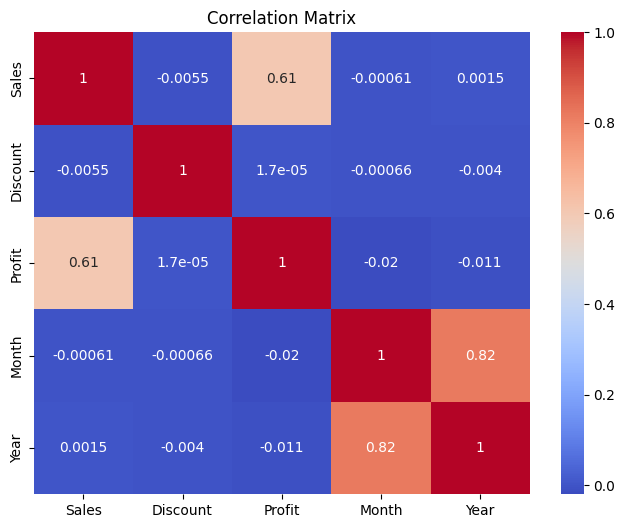

In [3]:
# Week 3: EDA

import matplotlib.pyplot as plt
import seaborn as sns

# Sales by category
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Category', y='Sales', estimator='sum', ci=None)
plt.title("Total Sales by Category")
plt.xticks(rotation=45)
plt.show()

# Profit by Region
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Region', y='Profit')
plt.title("Profit Distribution by Region")
plt.xticks(rotation=45)
plt.show()

# Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


# **Customer Segmentation (Clustering)**

Why: Helps identify which customer groups bring the most value.

How: Use KMeans clustering based on sales behavior.

<Axes: xlabel='Sales', ylabel='Profit'>

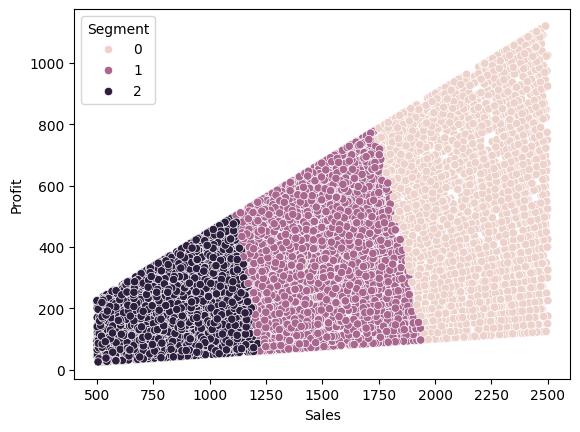

In [17]:
from sklearn.cluster import KMeans

df_cluster = df[['Sales', 'Profit', 'Discount']]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Segment'] = kmeans.fit_predict(df_cluster)

# Visualize clusters
import seaborn as sns
sns.scatterplot(data=df, x='Sales', y='Profit', hue='Segment')


# **Category Performance Dashboard (Summary Table)**

Why: Summarizes which categories are most/least profitable.

In [18]:
category_summary = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Profit', ascending=False)
print(category_summary)


                     Sales     Profit
Category                             
Snacks             2237546  568178.85
Eggs, Meat & Fish  2267401  567357.22
Fruits & Veggies   2100727  530400.38
Food Grains        2115272  529162.64
Bakery             2112281  528521.06
Beverages          2085313  525605.76
Oil & Masala       2038442  497895.29


# **Business Recommendations Section**

################Include in the report:

"Furniture has high sales but low profits – consider reducing discount levels."
"Office Supplies segment yields high profits with moderate sales – potential to scale."

In [20]:
# Week 4: Prepare summary data for external dashboard tools

# Export grouped summary
summary = df.groupby(['Category', 'Region'])[['Sales', 'Profit']].sum().reset_index()
summary.to_csv("category_region_summary.csv", index=False)

# Optional: save to Excel for Tableau/Power BI use
df.to_excel("Supermart_Cleaned_Data.xlsx", index=False)


In [10]:
# Week 5: Feature Engineering and Simple Regression
#1. Simple Linear Regression (using Sales and Discount)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Load dataset
df = pd.read_csv("Supermart Grocery Sales - Retail Analytics Dataset.csv")

# Define features and target
X = df[['Sales', 'Discount']]
y = df['Profit']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Simple Model Evaluation")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))


Simple Model Evaluation
MAE: 158.7790900362036
R² Score: 0.35562312780752237


In [13]:
#2. Enhanced Regression Model (with encoded Category)
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Features including categorical
X = df[['Sales', 'Discount', 'Category']]
y = df['Profit']

# One-hot encode 'Category'
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first'), ['Category'])],
    remainder='passthrough'
)

# Create pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit model
pipeline.fit(X_train, y_train)

# Predict
y_pred = pipeline.predict(X_test)

# Evaluate
print("\nEnhanced Model with Encoded Category")
print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))



Enhanced Model with Encoded Category
MAE: 158.7397128779615
R² Score: 0.35575549876728807


In [11]:
# Week 6: Simulate a prediction function

def predict_profit(sales, quantity, discount):
    return model.predict([[sales,discount]])[0]

# Example use
print("Predicted profit:", predict_profit(200, 3, 0.1))


Predicted profit: 53.5939462964044


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [12]:
# Week 8: Export final processed data
df.to_csv("Final_Supermart_Data.csv", index=False)

# Save the final model
import joblib
joblib.dump(model, "supermart_profit_model.pkl")


['supermart_profit_model.pkl']

In [15]:
import joblib

# Save the simple linear regression model
joblib.dump(model, "simple_model.pkl")

# Save the enhanced model with encoded 'Category'
joblib.dump(pipeline, "enhanced_model.pkl")

print("Models saved successfully.")


Models saved successfully.
